# <center> Part 1. Introduction to Data Background and Data Exploration

## 1. Business Background and Data Background

### 1.1 Basic Information of the Dataset

The data for this case study is sourced from a modeling dataset on the Kaggle platform: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn). This dataset describes basic information about customers of a telecommunications company, including the services each customer has subscribed to, account details, demographic information, and most importantly, the core label field for prediction in subsequent modeling – customer churn status.

According to the description shared by the IBM Business Community Sharing Team, this dataset contains records related to a telecommunications company providing phone and internet services to over 7,000 customers (both individual and household) in California.

In [3]:
import numpy as np
import pandas as pd

In [4]:
tcc = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
pd.set_option('max_colwidth',200)

tcc.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1.2 Business Background of Customer Churn and Modeling Objectives

- Introduction to Telecommunications Business Background

The competition in the telecommunications market has become increasingly fierce. Generally, a healthy competitive landscape in the telecommunications sector involves the presence of 3-4 operators. In the digital age, traditional mass marketing has lost its edge, and the ability to conduct more precise marketing based on user information and behavior to meet the increasingly diverse, layered, and personalized needs of users has become a challenge that all telecommunications operators must face.

At the same time, public telecommunications customers (individuals or households) exhibit characteristics such as variability, growth potential, and substitutability. These customers also have relatively inelastic demand, and the typical purchase cycle for telecommunications products is long. As a result, in actual business relationships, telecom companies face difficulties in acquiring new public customers, and the cost of actively expanding their user base is high. Therefore, retaining existing customers and preventing customer churn has become a critical operational strategy.

For telecommunications operators, customer churn can be influenced by various random factors. However, by digitally describing user attributes and behaviors, we can explore the "clues" leading to customer churn within this data. Importantly, if real-time access to this data is possible, it may even enable the use of models to predict the risk of future customer churn. This would allow for the timely formulation of retention strategies to prevent actual customer churn from occurring.

The actual goals of the algorithmic modeling process are twofold. 
- Firstly, it's to predict customer churn.
- Secondly, it's to identify the key factors influencing customer churn. This information can assist operational personnel in adjusting marketing strategies or devising customer retention measures.

We require that the model not only possesses predictive capabilities but also outputs feature importance rankings. Moreover, it's preferable for the model to have a certain level of interpretability, meaning it can clearly explain how changes in features affect changes in the label values. Given these requirements, we can first consider logistic regression models. The linear equations in logistic regression provide excellent interpretability of results. Additionally, we can evaluate feature importance using regularization terms within logistic regression.

Furthermore, we can consider constructing decision trees or ensemble models to address this problem. Decision trees also offer good interpretability, and we can assess feature importance based on the decrease in information entropy (or Gini coefficient) within the tree model.

## 2. Data Interpretation and Preprocessing

### 2.1 Field Descriptions

First, let's provide explanations based on the meanings of the dataset fields. Although the dataset doesn't come with a specific data dictionary to explain each field, we can generally infer meanings from the field names:

- `customerID`: Customer ID or unique identifier for each customer.
- `gender`: Customer's gender (e.g., Male or Female).
- `SeniorCitizen`: Indicates whether the customer is a senior citizen (1 for yes, 0 for no).
- `Partner`: Indicates whether the customer has a partner (Yes or No).
- `Dependents`: Indicates whether the customer has dependents (Yes or No).
- `tenure`: The number of months the customer has stayed with the company.
- `PhoneService`: Indicates whether the customer has phone service (Yes or No).
- `MultipleLines`: Indicates whether the customer has multiple phone lines (Yes, No, or No phone service).
- `InternetService`: Type of internet service subscribed by the customer (e.g., DSL, Fiber optic).
- `OnlineSecurity`: Indicates whether the customer has online security (Yes, No, or No internet service).
- `OnlineBackup`: Indicates whether the customer has online backup (Yes, No, or No internet service).
- `DeviceProtection`: Indicates whether the customer has device protection (Yes, No, or No internet service).
- `TechSupport`: Indicates whether the customer has tech support (Yes, No, or No internet service).
- `StreamingTV`: Indicates whether the customer has streaming TV (Yes, No, or No internet service).
- `StreamingMovies`: Indicates whether the customer has streaming movies (Yes, No, or No internet service).
- `Contract`: The type of contract the customer has (e.g., Month-to-month, One year, Two year).
- `PaperlessBilling`: Indicates whether the customer receives paperless billing (Yes or No).
- `PaymentMethod`: The customer's payment method (e.g., Electronic check, Mailed check, Bank transfer, Credit card).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Indicates whether the customer churned (left the service) or not (Yes or No).

In [8]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the official dataset description, the fields can be roughly categorized into three groups, representing information about services the customer has subscribed to, account-related information, and demographic information. Here's how the fields are divided into these three categories:

**User-Registered Services Information:**
- `PhoneService`
- `MultipleLines`
- `InternetService`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`

**User Account Information:**
- `customerID`
- `tenure`
- `Contract`
- `PaperlessBilling`
- `PaymentMethod`
- `MonthlyCharges`
- `TotalCharges`

**Demographic Information:**
- `gender`
- `SeniorCitizen`
- `Partner`
- `Dependents`
- `Churn`

### 2.2 Data Quality Exploration

- Dataset Accuracy Verification

Data accuracy verification involves two aspects: firstly, checking whether the fields in the dataset match those in the data dictionary, and secondly, verifying whether there are any duplicate entries in the ID column of the dataset. Since the dataset does not provide a data dictionary, the primary focus here is on checking for duplicate IDs in the dataset.

In [10]:
tcc['customerID'].nunique() == tcc.shape[0]

True

In [11]:
tcc.duplicated().sum()

0

- Data Missing Value Check

In [12]:
tcc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
def missing(df):
    """
    Calculate the number and percentage of missing values for each column.
    """
    missing_number = df.isnull().sum().sort_values(ascending=False)  # Sum of missing values for each column, sorted in descending order
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)  # Percentage of missing values for each column
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])  # Combine into a DataFrame
    return missing_values


In [14]:
missing(tcc)

,Missing_Number,Missing_Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


From the above results, it can be seen that there are no missing values in the dataset. However, The absence of missing values only indicates that there are no "None" or "NaN" values in the dataset. It does not rule out the possibility that missing values may be represented by other values.

### 2.3 Field Type Exploration

Based on the dataset info, it appears that most of the fields are discrete, and many are of object type. We cannot directly use object-type variables for modeling and analysis. Therefore, we need to perform data type conversion. We can consider categorizing the fields into continuous and discrete types. For discrete fields, we need to further differentiate between nominal and ordinal variables based on their specific meanings.

However, before categorizing into continuous/discrete fields, we noticed the presence of an "entry time" field in the dataset, which appears to be a time series field. It's important to note that a time-stamped time series field is neither a continuous nor a discrete field (although it can be treated as a discrete field, doing so may lose some information to us). Therefore, we need to pay special attention to whether the "entry time" field is indeed a time-stamped field.

In [16]:
tcc['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

This field does not appear to be a typical time field labeled with year, month, and day (e.g., "2020-08-01"). Instead, it seems to consist of a continuous series of numerical values, which saved us from formal worry.

In [17]:
tcc['tenure'].nunique()

73

There are a total of 73 different values in this field. Combined with the previous information that the dataset represents user data for the third quarter, I infer that this field is most likely a discrete field that has been sorted according to a dictionary or a categorical encoding.

Which means, In the third quarter, the activities of these users occurred within 73 specific days. However, this field has lost the original information regarding the actual entry time for each user due to dictionary sorting. For now, it's reasonable to treat it as a discrete variable, and adjustments to continue variable can be made later based on the specific analysis needs.

- Labeling Continuous/Discrete Variables

In [95]:
# Discrete Fields
category_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']

# Continuous Fields
numeric_cols = ['MonthlyCharges', 'TotalCharges']

# Target
target = 'Churn'

ID_col = 'customerID'

# Verify that the division is complete
assert len(category_cols) + len(numeric_cols) + 1 == tcc.shape[1]

Next, I'll transform the different types of fields. During this process, we need to check whether there are cases where missing values are represented using different values. Although we have already checked for missing values, we need to be attentive to whether the dataset contains situations where missing values are represented by certain symbols, such as spaces or other characters:

In [22]:
tcc[category_cols].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [23]:
for feature in tcc[category_cols]:
        print(f'{feature}: {tcc[feature].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

There are no cases where missing values are represented by other values in the dataset.

For continues variable, formor way wounldn't work as it has too much distinct value.

In [28]:
# It's not possible to convert all fields to numeric type; running this will result in an error.

# tcc[numeric_cols].astype(float)

# We have found spaces in the continuous features.

- Missing Value Check and Imputation

In [29]:
def find_index(data_col, val):
    """
    Find the index of the first occurrence of a value in a column, or return -1 if not found.
    
    :param data_col: The column to search.
    :param val: The specific value to find.
    """
    val_list = [val]
    if data_col.isin(val_list).sum() == 0:
        index = -1
    else:
        index = data_col.isin(val_list).idxmax()
    return index


In [30]:
for col in numeric_cols:
    print(find_index(tcc[col], ' '))

-1
488


In [31]:
tcc['TotalCharges']= tcc['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
tcc['MonthlyCharges'] = tcc['MonthlyCharges'].astype(float)

In [32]:
missing(tcc[numeric_cols])

,Missing_Number,Missing_Percent
TotalCharges,11,0.001562
MonthlyCharges,0,0.000000


Since the proportion of missing values is relatively small, we can directly use the mean value for imputation:

However, if we look into the data, we will find the tenure of these customer are all zero, which probably means they haven't make a payment before this month yet. 

In [34]:
tcc[tcc['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


For double check, 

In [35]:
(tcc['TotalCharges'] == 0).sum()

0

In that case, we fill the missing values in these 11 records with 0 to indicate that the total monthly charges for these users before the last month were 0.

In [36]:
tcc['TotalCharges'] = tcc['TotalCharges'].fillna(0)

In [37]:
tcc['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

- Outlier Detection

Checking for outliers using the three times standard deviation method:

In [38]:
tcc[numeric_cols].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


In [39]:
tcc['MonthlyCharges'].mean() + 3 * tcc['MonthlyCharges'].std()

155.03183375363483

In [40]:
tcc['MonthlyCharges'].mean() - 3 * tcc['MonthlyCharges'].std()

-25.5084488324364

In [41]:
tcc['TotalCharges'].mean() + 3 * tcc['TotalCharges'].std()

9080.117712630885

In [42]:
tcc['TotalCharges'].mean() - 3 * tcc['TotalCharges'].std()

-4520.649105503233

Identifying outlier points through box plots:

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'TotalCharges')

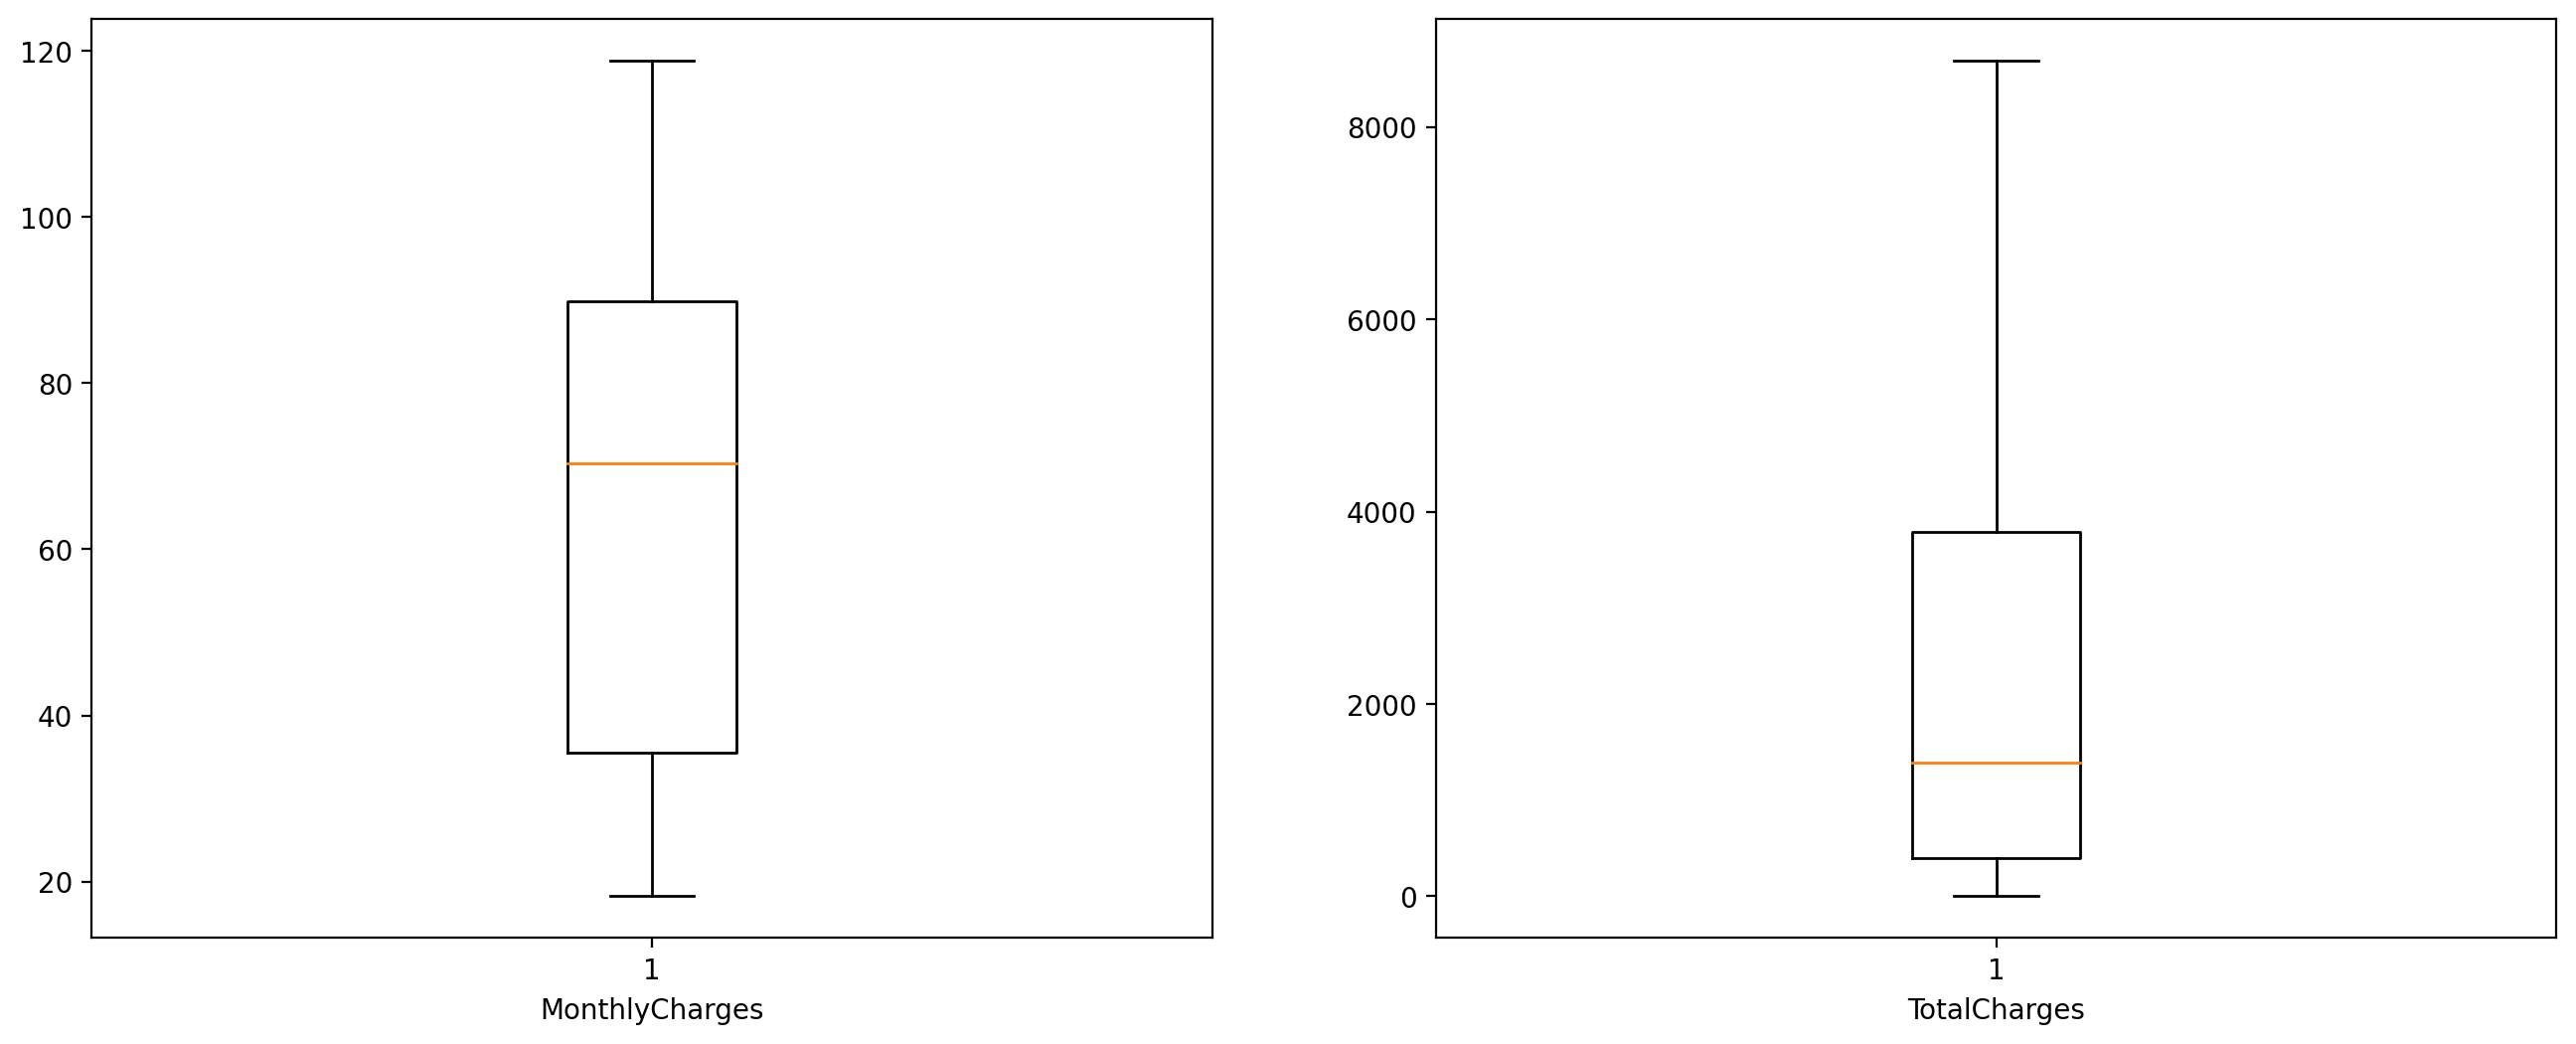

In [51]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
plt.boxplot(tcc['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.subplot(122)
plt.boxplot(tcc['TotalCharges'])
plt.xlabel('TotalCharges')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

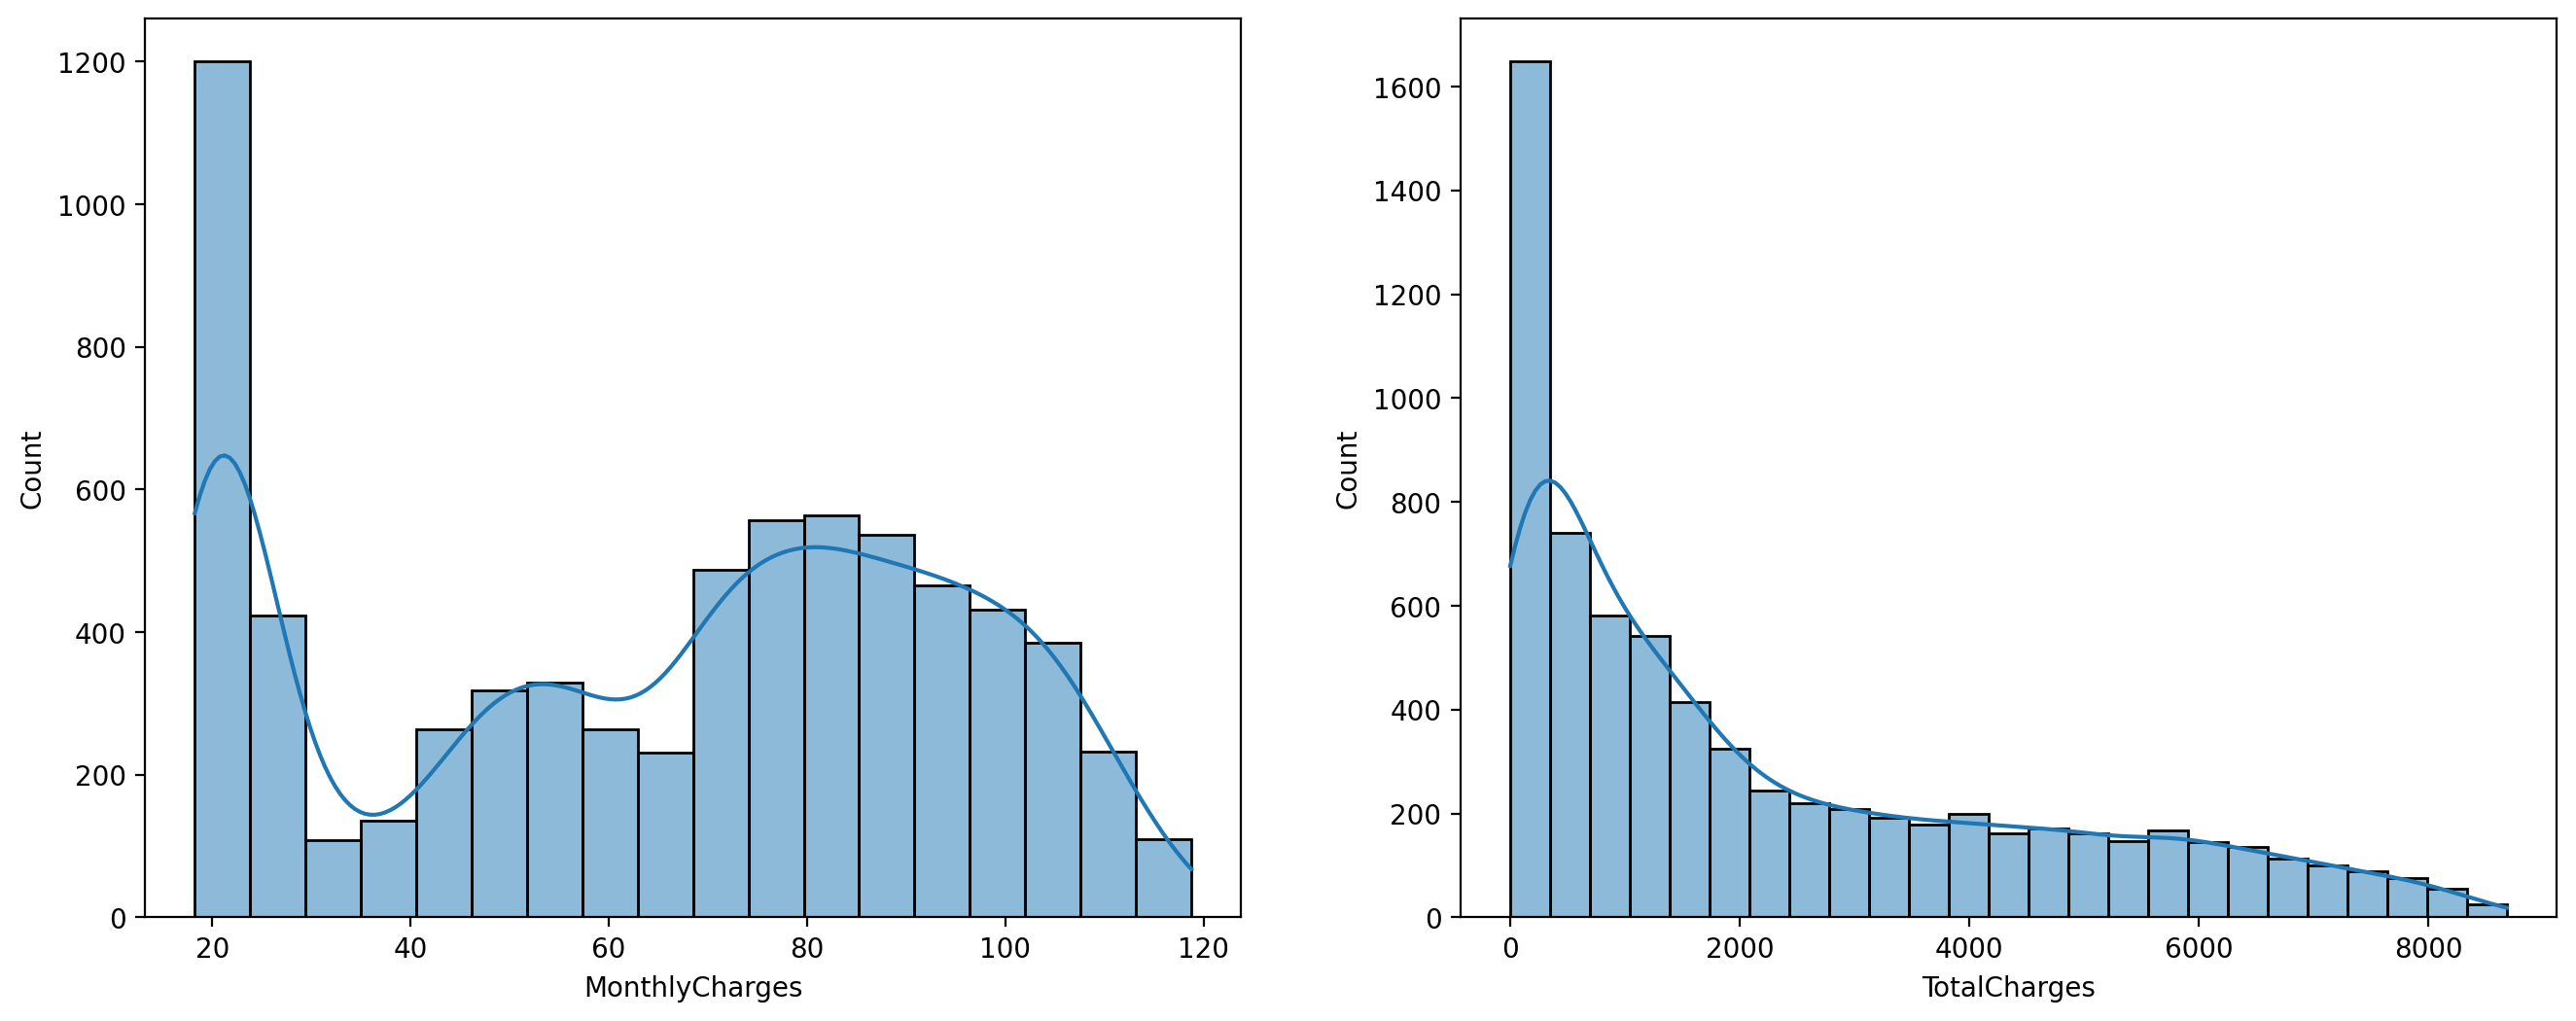

In [52]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
sns.histplot(tcc['MonthlyCharges'], kde=True) 
plt.subplot(122)
sns.histplot(tcc['TotalCharges'], kde=True)

There are no outlier points in the dataset.

## 3. Exploratory Data Analysis and Variable Correlation Analysis

### 3.1 Distribution of Label Values

In [53]:
y = tcc['Churn']
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customer)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customer)')

Percentage of Churn:  26.54 %  --> (1869 customer)
Percentage of customer did not churn: 73.46  %  --> (5174 customer)


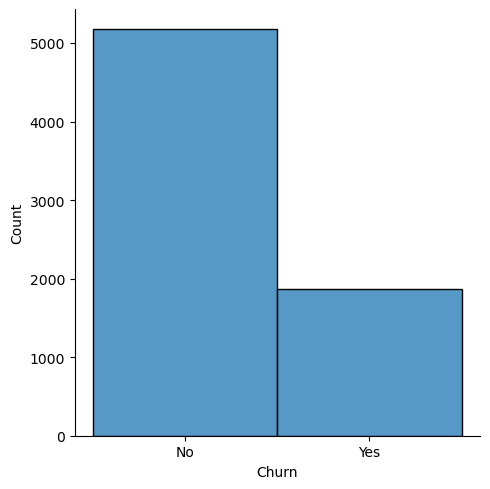

In [54]:
sns.displot(y)

### 3.2 Variable Correlation Analysis

- Calculate the Correlation Matrix

To better analyze how categorical variables affect the label values, we need to convert the label to an integer (treat it as a continuous variable) and convert all categorical variables into dummy variables:

In [60]:
# Remove the ID column
df3 = tcc.iloc[:, 1:].copy()

# Convert the labels Yes/No to 1/0
df3['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df3['Churn'].replace(to_replace='No', value=0, inplace=True)

# Convert all other categorical variables into dummy variables, and keep continuous variables unchanged
df_dummies = pd.get_dummies(df3)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [61]:
df_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

<AxesSubplot:>

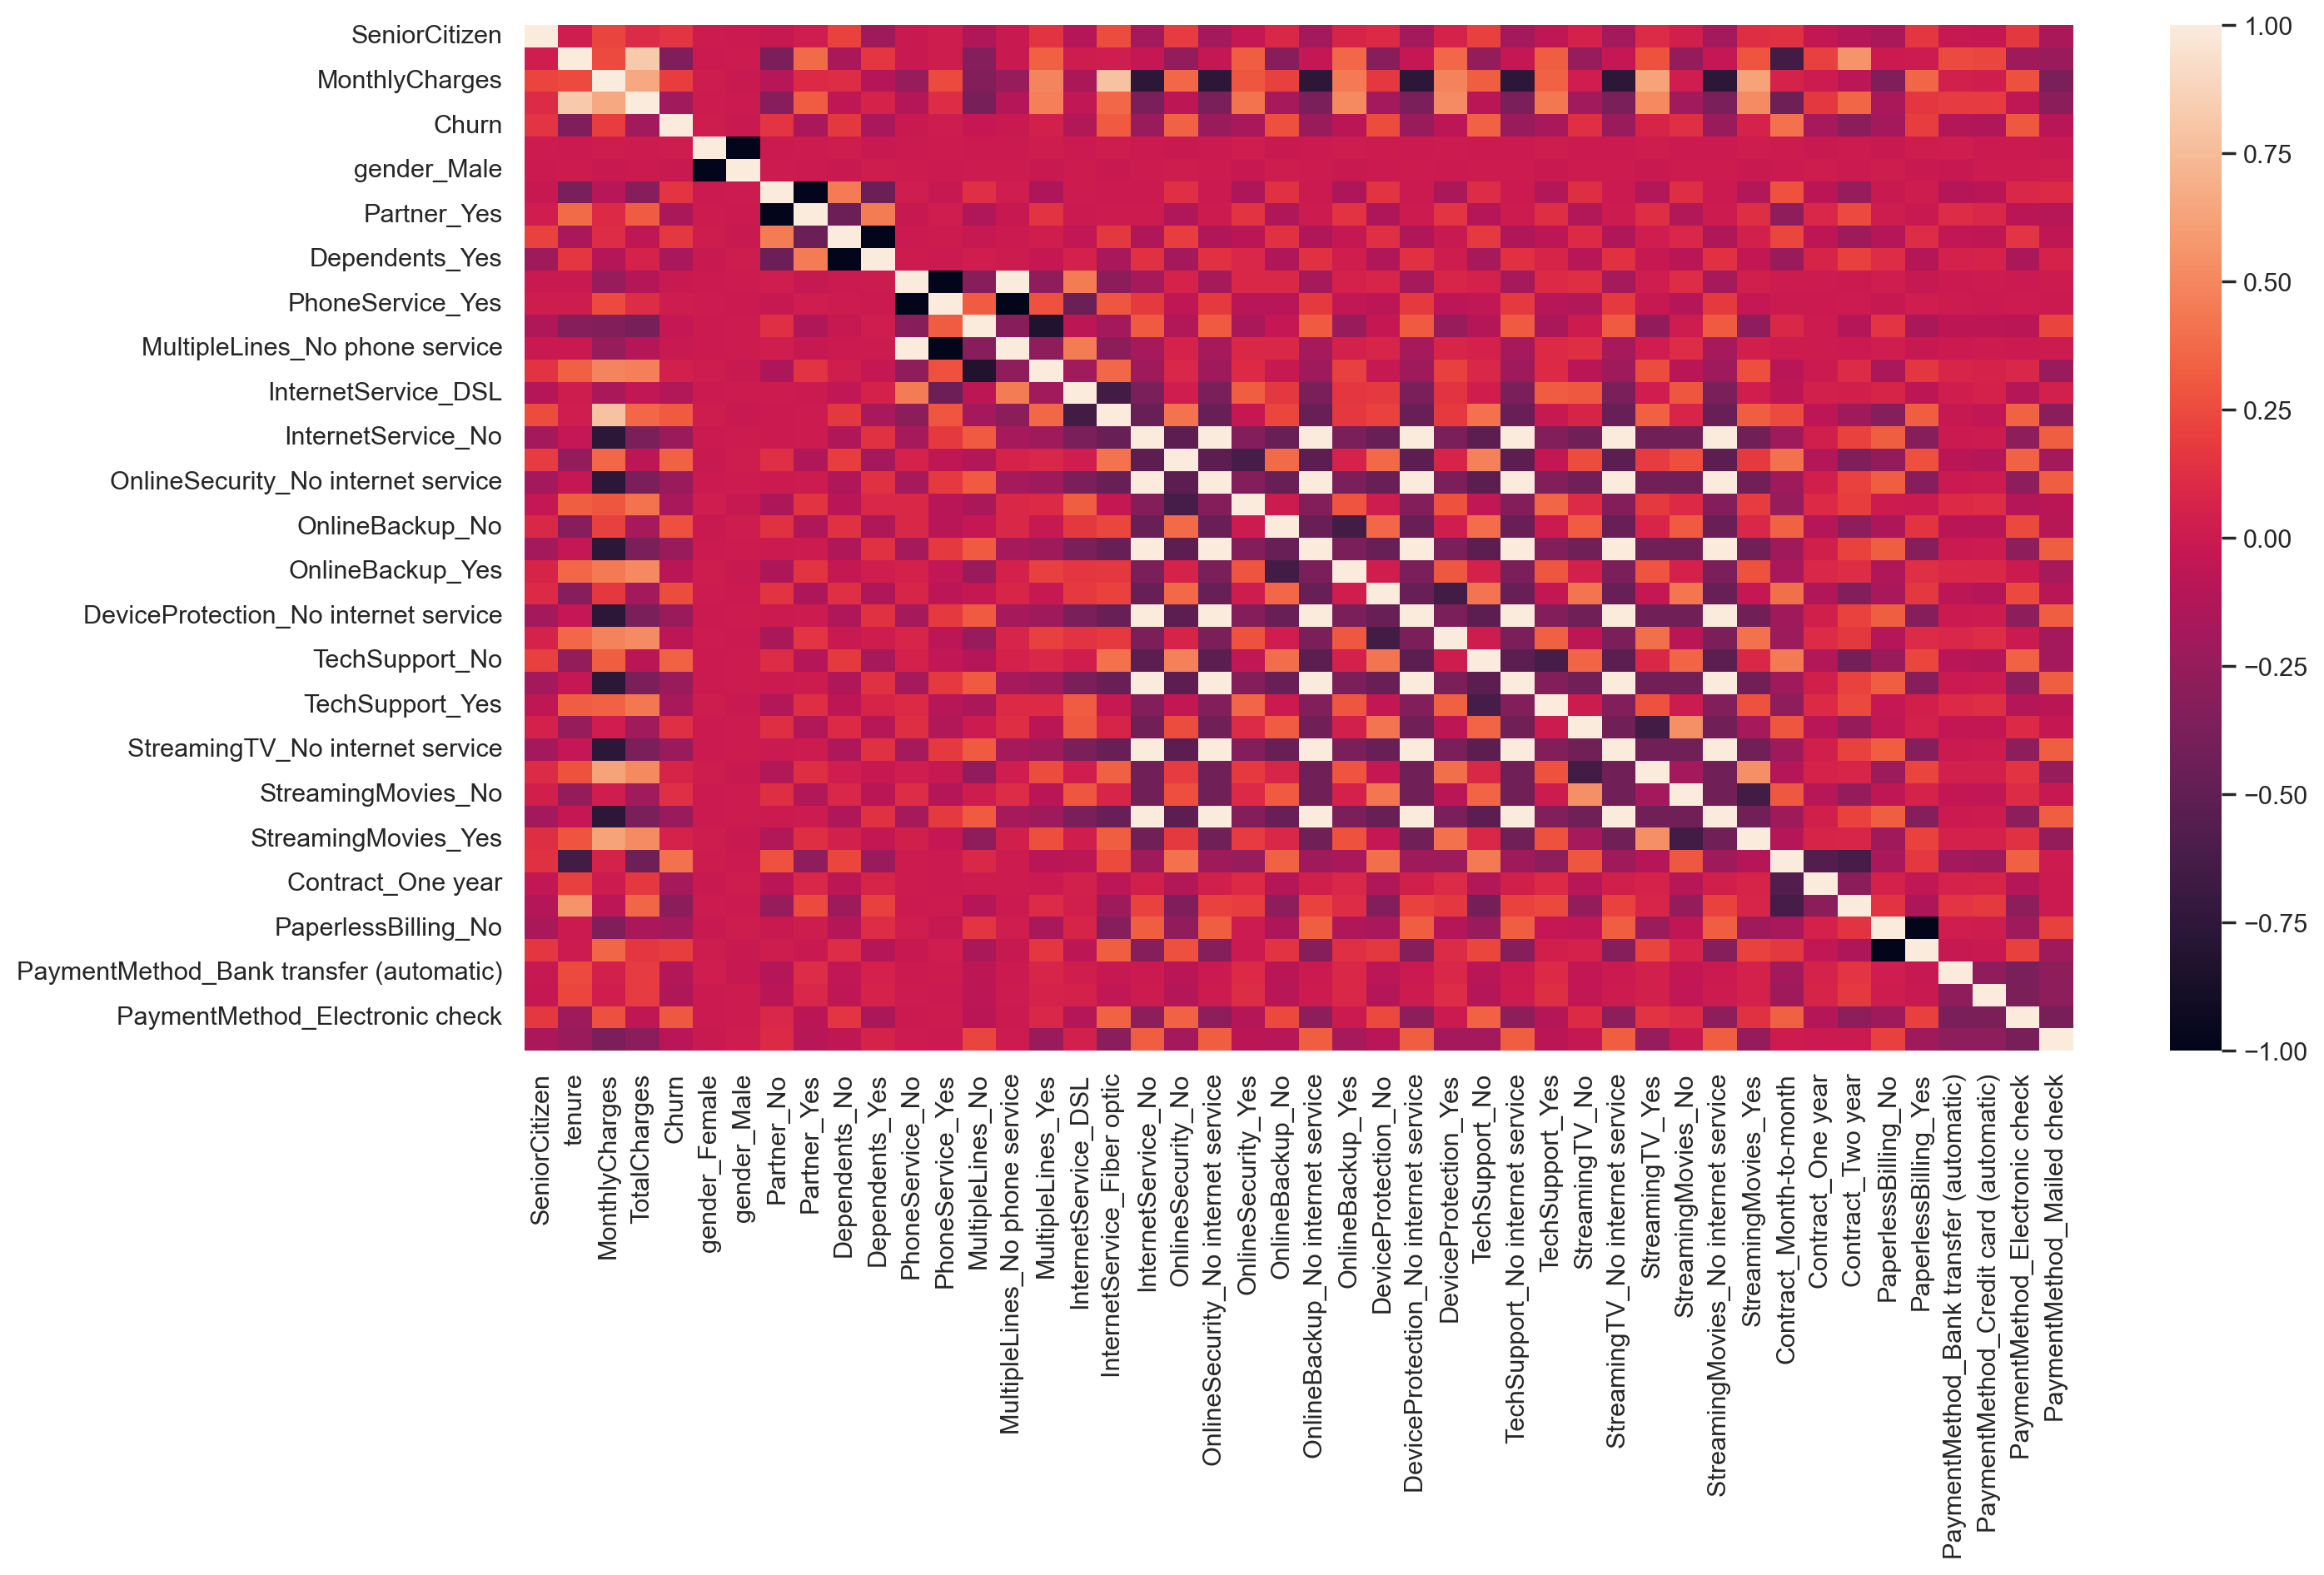

In [68]:
plt.figure(figsize=(15,8), dpi=200)
sns.heatmap (df_dummies.corr())

<AxesSubplot:>

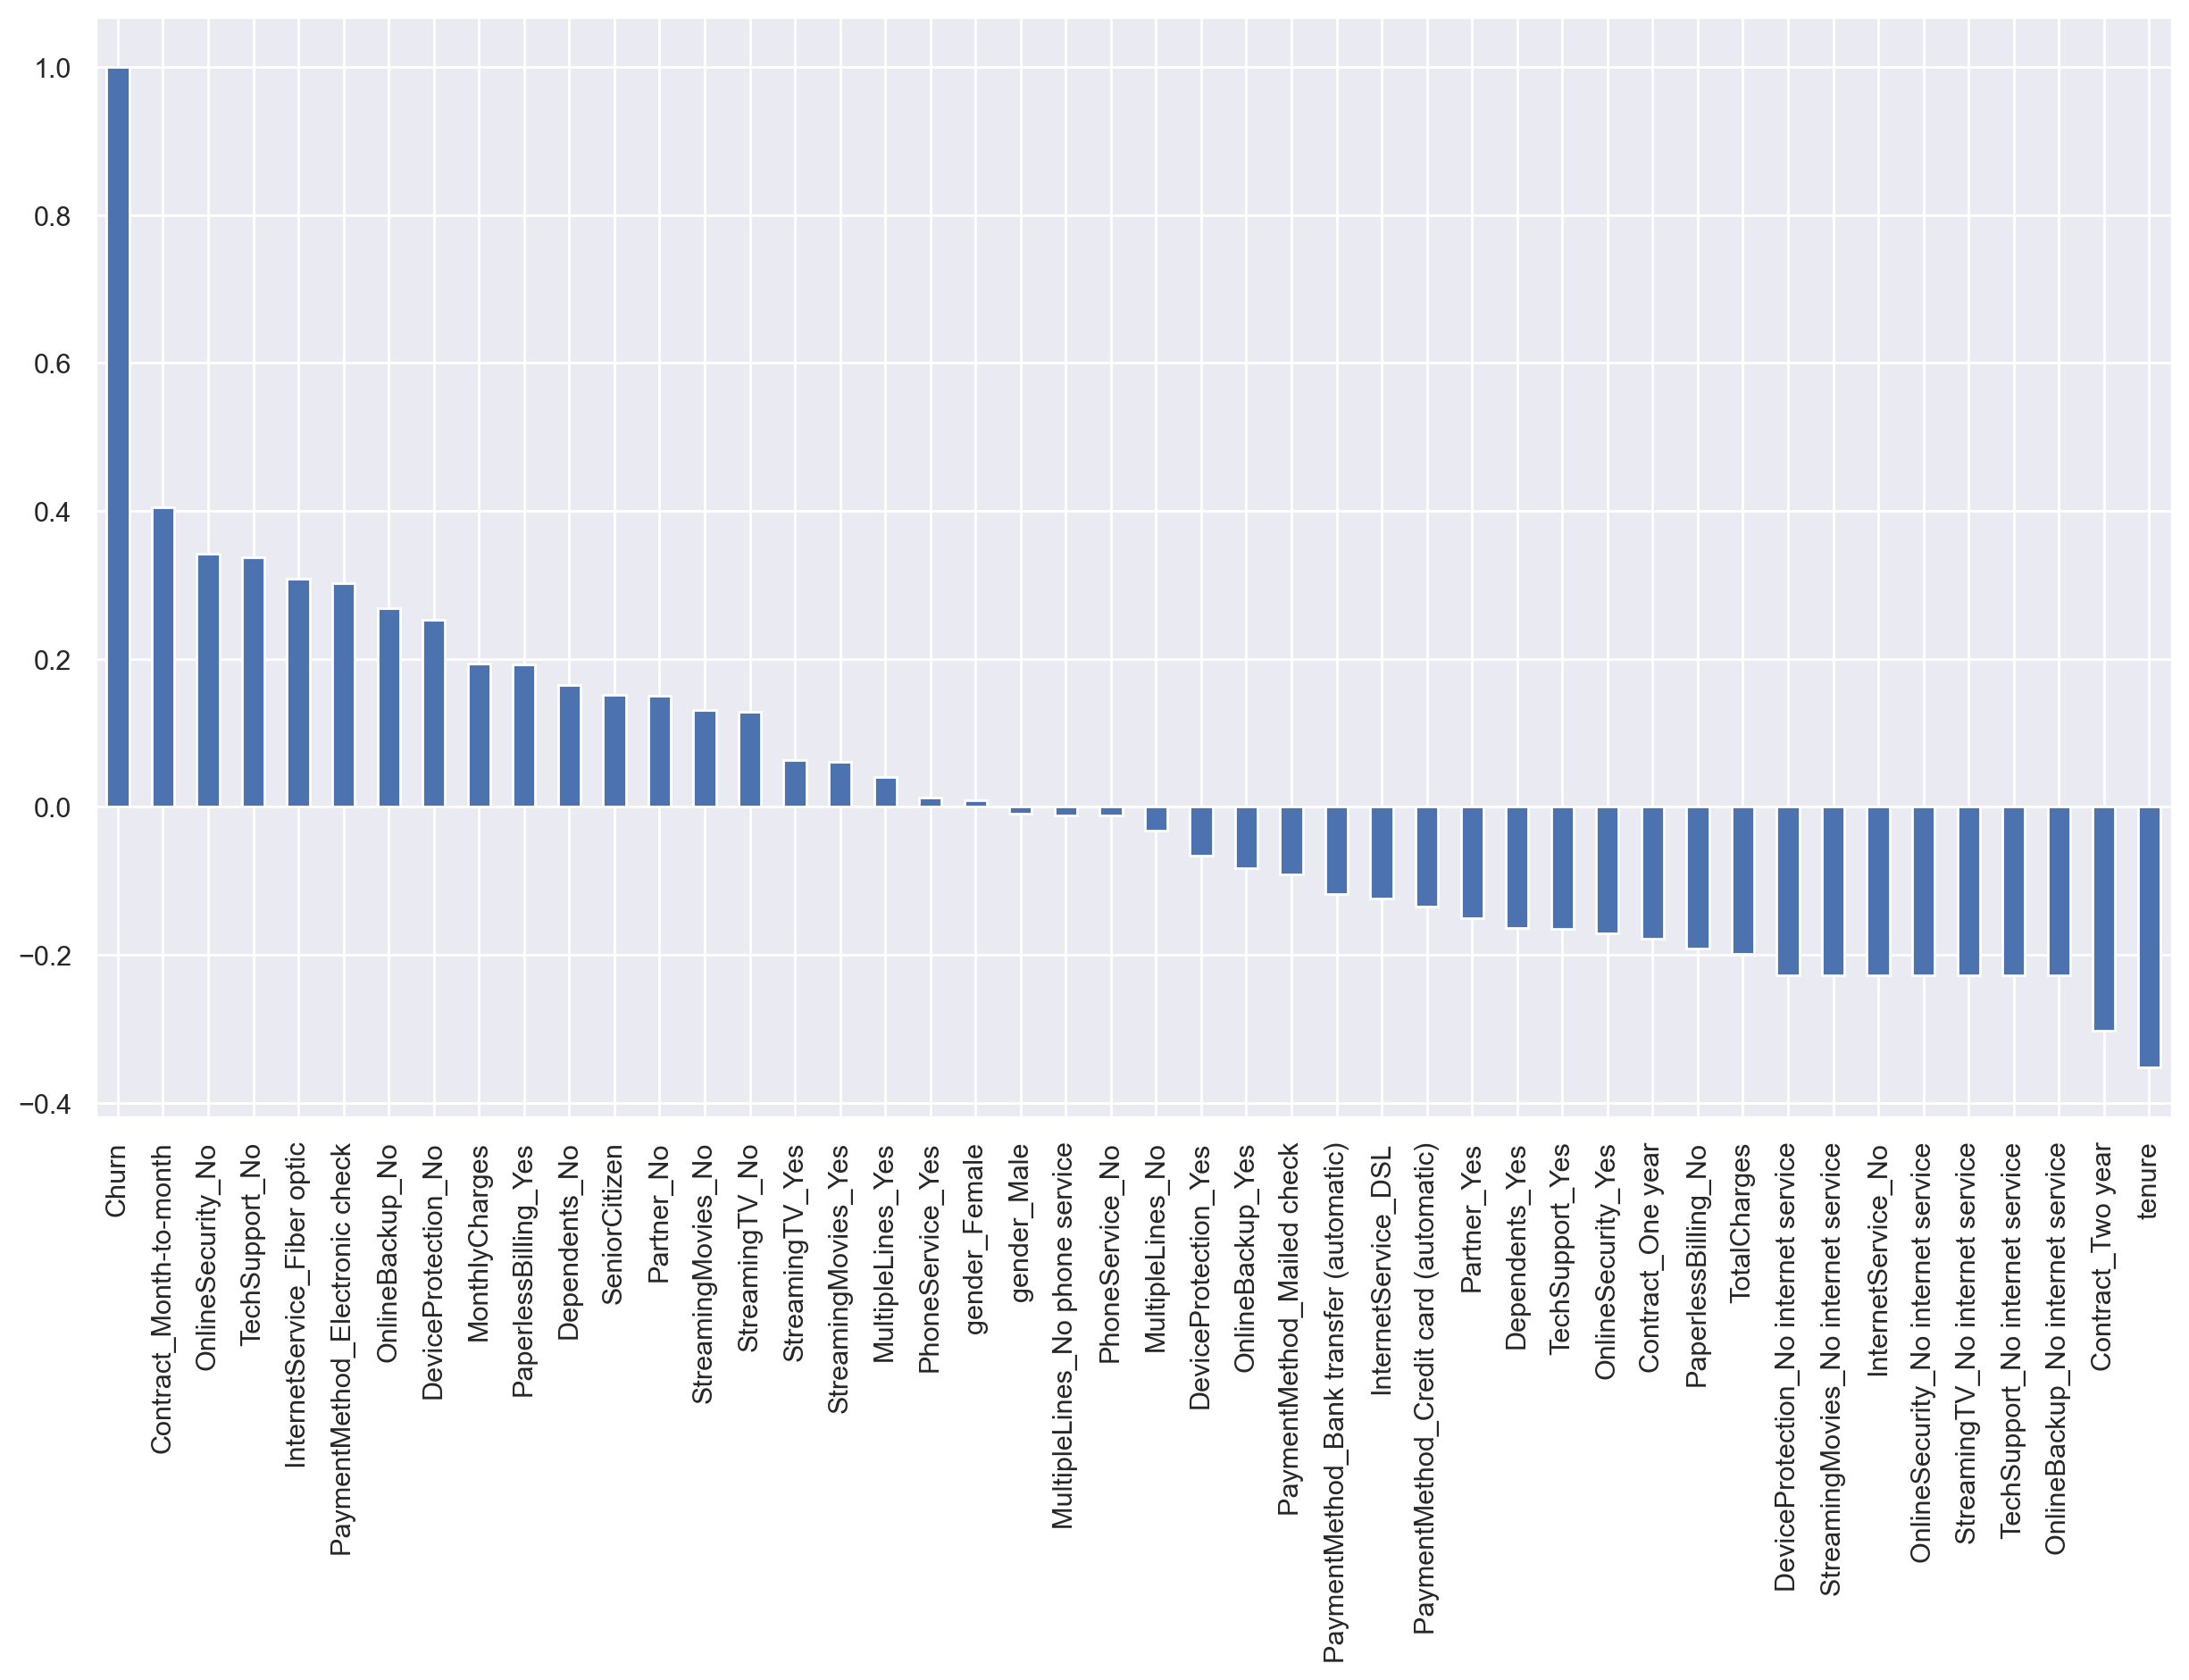

In [70]:
sns.set()
plt.figure(figsize=(15,8), dpi=200)

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### 3.3 Exploratory Data Analysis (EDA)



- Demographic Information of Customers

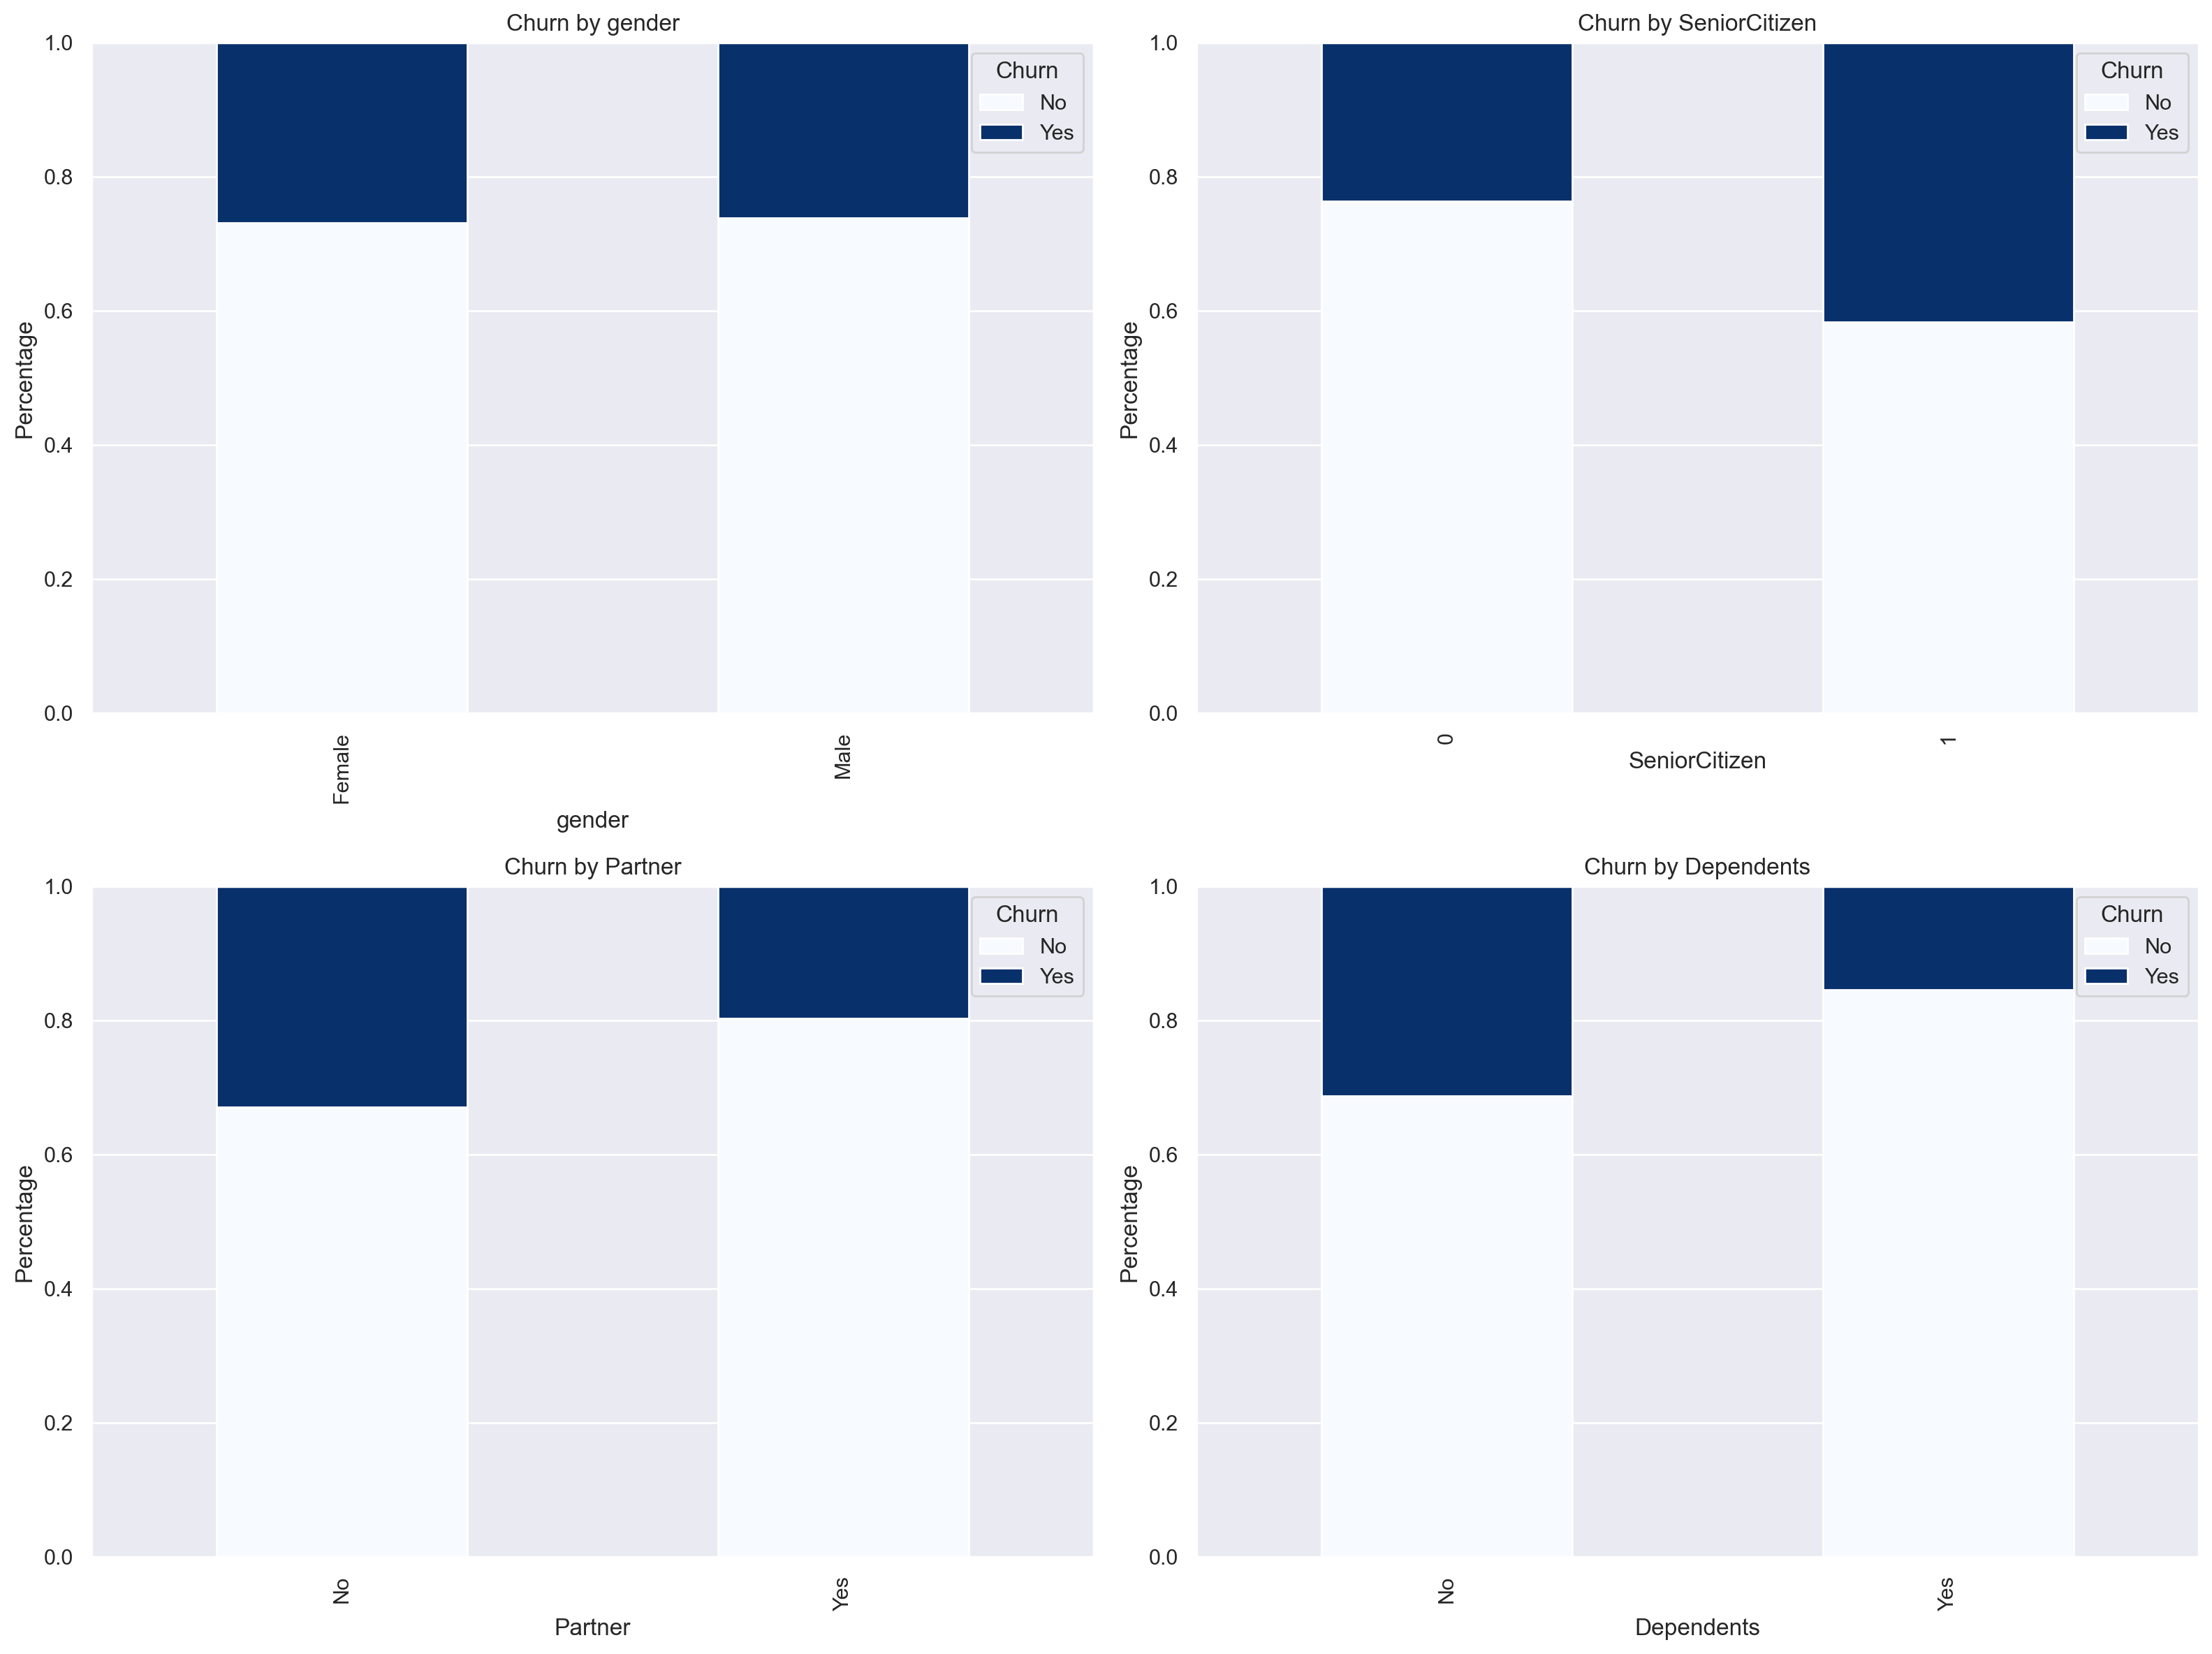

In [94]:
col_1 = ["gender", "SeniorCitizen", "Partner", "Dependents"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), dpi=200)

for i, item in enumerate(col_1):
    plt.subplot(2, 2, (i+1))
    
    # Calculate the relative frequencies
    count_df = tcc.groupby([item, 'Churn']).size().unstack().fillna(0)
    count_df_percentage = (count_df.T / count_df.sum(axis=1)).T
    
    # Plot 100% stacked bar chart
    count_df_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), colormap="Blues")
    
    plt.xlabel(item)
    plt.title("Churn by " + item)
    plt.ylim([0,1])
    plt.ylabel('Percentage')
    plt.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()

Senior users, unmarried users, and economically dependent users have relatively higher churn rates, while gender does not seem to have a significant impact on whether users churn.

- Registered Service Information

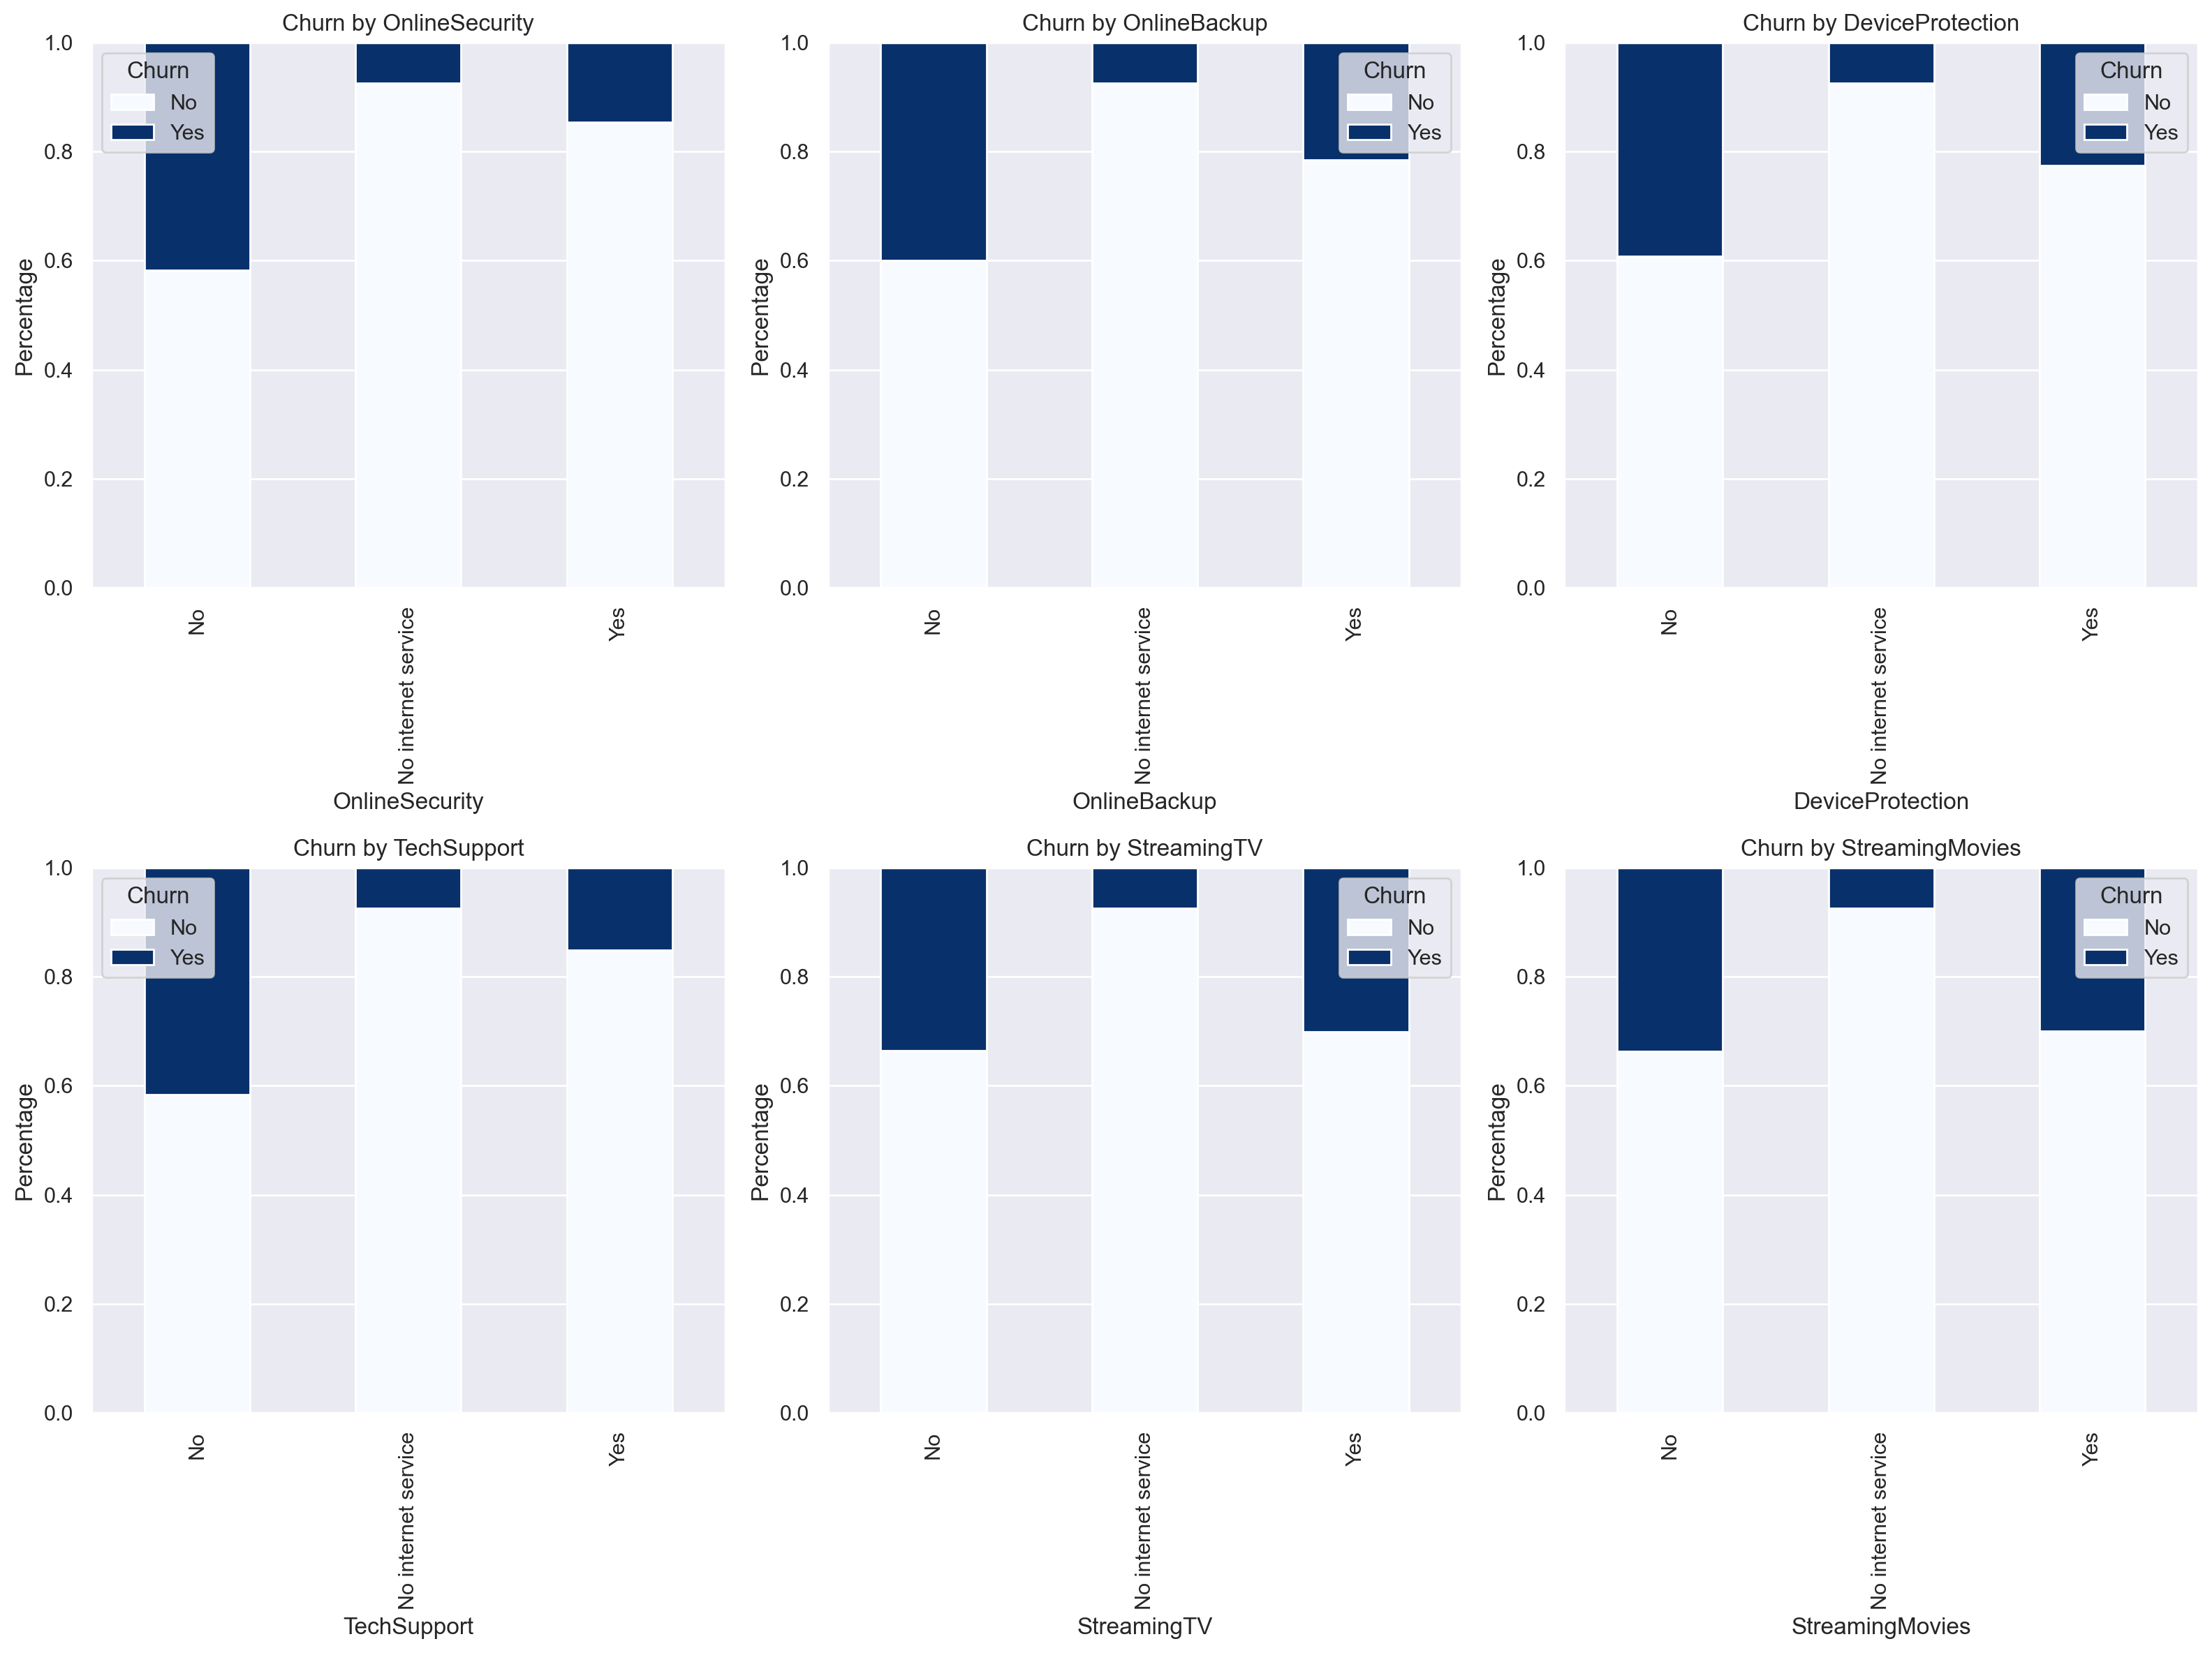

In [91]:
col_2 = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12), dpi=200)

for i, item in enumerate(col_2):
    plt.subplot(2, 3, (i+1))
    
    # Calculate the relative frequencies
    count_df = tcc.groupby([item, 'Churn']).size().unstack().fillna(0)
    count_df_percentage = (count_df.T / count_df.sum(axis=1)).T
    
    # Plot 100% stacked bar chart
    count_df_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), colormap="Blues")
    
    plt.xlabel(item)
    plt.title("Churn by " + item)
    plt.ylim([0,1])
    plt.ylabel('Percentage')
    plt.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()

Users who have not subscribed to internet services and those who have subscribed to internet services and simultaneously opted for many value-added services tend to have a lower churn probability. On the other hand, users who have subscribed to internet services but have not opted for other value-added services tend to have a higher churn probability. Therefore, it may be worthwhile to consider offering more opportunities for free trial of value-added services, increasing promotion of such services, and encouraging users to purchase them, thereby enhancing user retention.

- User Contract Attributes

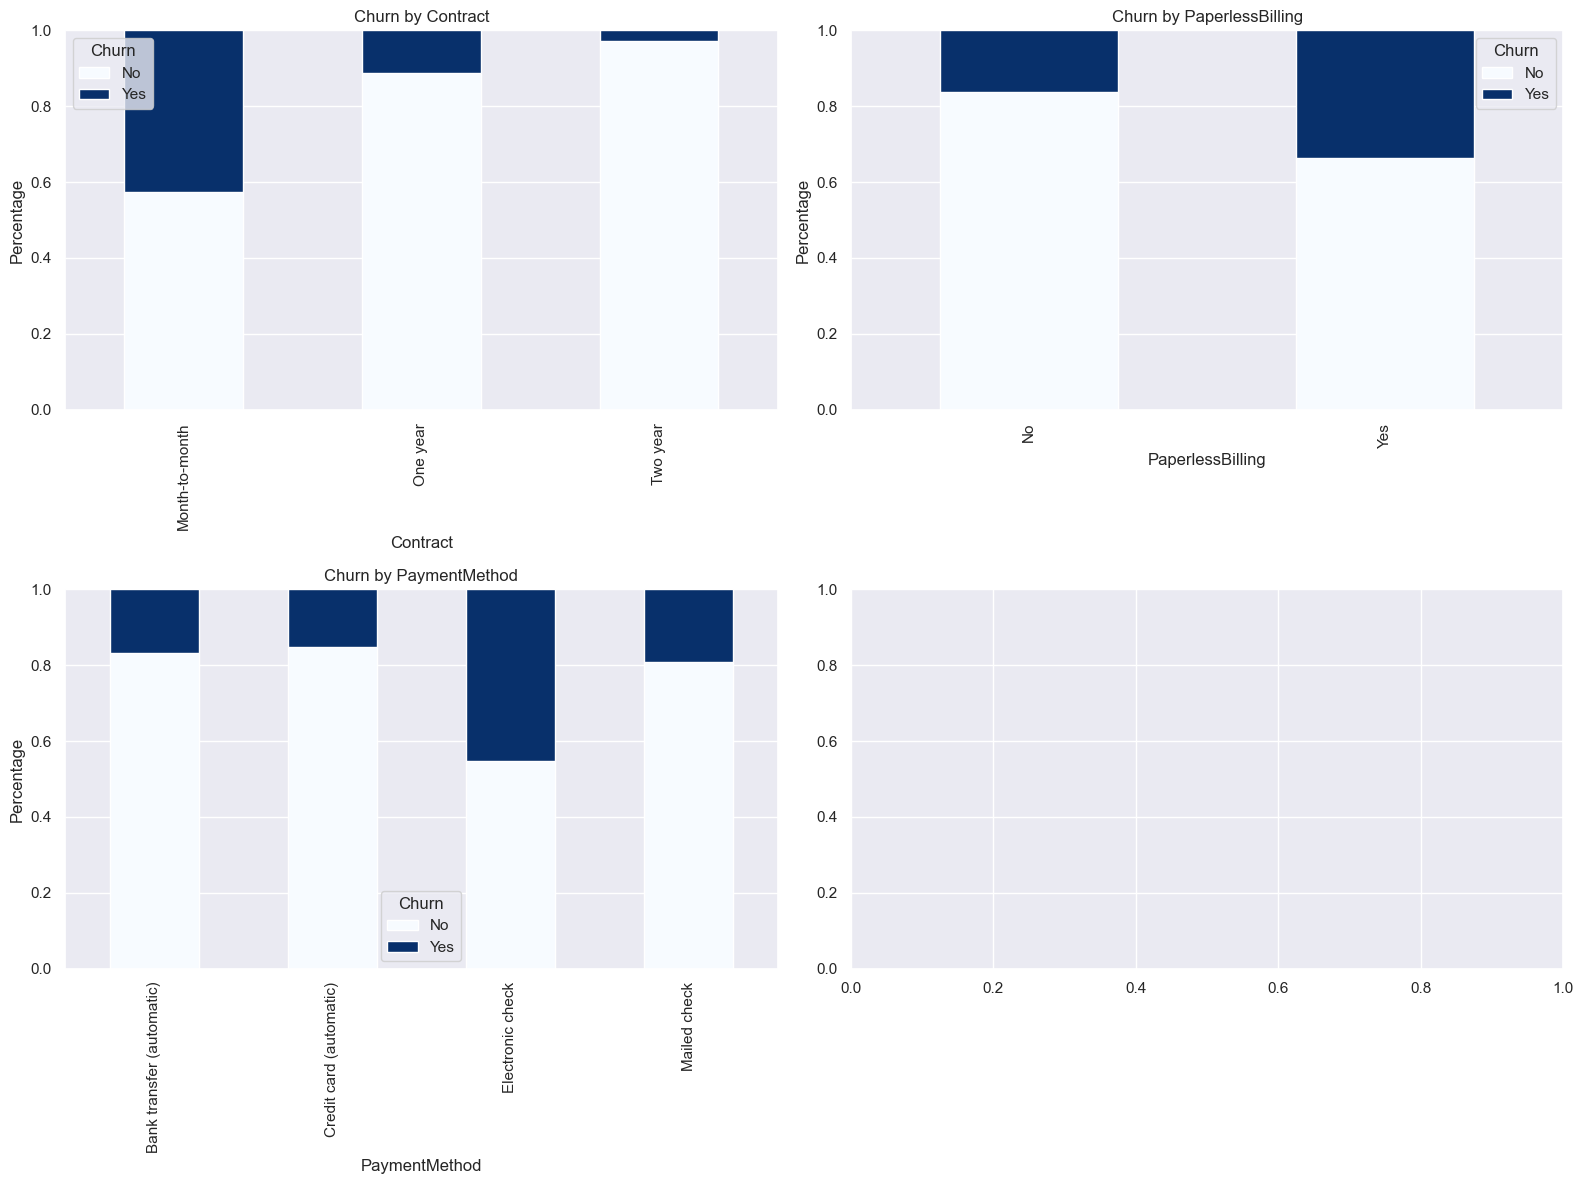

In [92]:
col_3 = ["Contract", "PaperlessBilling", "PaymentMethod"]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,12))

for i, item in enumerate(col_3):
    plt.subplot(2, 2, (i+1))
    
    # Calculate the relative frequencies
    count_df = tcc.groupby([item, 'Churn']).size().unstack().fillna(0)
    count_df_percentage = (count_df.T / count_df.sum(axis=1)).T
    
    # Plot 100% stacked bar chart
    count_df_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), colormap="Blues")
    
    plt.xlabel(item)
    plt.title("Churn by " + item)
    plt.ylim([0,1])
    plt.ylabel('Percentage')
    plt.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()

Users who sign shorter-term contracts are more likely to churn, and users who pay online are more likely to churn compared to other payment methods. Therefore, it may be beneficial to guide users to sign longer-term contracts in the actual operation process, whether through discounts or additional incentives, in order to increase user lifetime value. Additionally, there is a need to pay closer attention to the actual product experience of online payment users. Consider improving the user experience of online payments or offering more price incentives to enhance user satisfaction with online payment methods.

# <center> Part 2. Model Training

Here, we will temporarily categorize "tenure" as a continuous field to prevent the generation of too many features during one-hot encoding in the subsequent steps.

## 1. Decision Tree Model

In [183]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [172]:
# Set up the transformer pipeline
tree_pre = ColumnTransformer([
    ('cat', preprocessing.OrdinalEncoder(), category_cols), 
    ('num', 'passthrough', numeric_cols)
])

# Instantiate the Decision Tree estimator
tree_model = DecisionTreeClassifier()

# Set up the machine learning pipeline
tree_pipe = make_pipeline(tree_pre, tree_model)


In [173]:
tree_param = {
    'decisiontreeclassifier__ccp_alpha': np.arange(0, 1, 0.1).tolist(),
    'decisiontreeclassifier__max_depth': np.arange(2, 8, 1).tolist(), 
    'decisiontreeclassifier__min_samples_split': np.arange(2, 5, 1).tolist(), 
    'decisiontreeclassifier__min_samples_leaf': np.arange(1, 4, 1).tolist(), 
    'decisiontreeclassifier__max_leaf_nodes': np.arange(6, 10, 1).tolist()
}

In [174]:
# Instantiate the grid search estimator
tree_search = GridSearchCV(estimator=tree_pipe,
                           param_grid=tree_param,
                           n_jobs=12)


In [176]:
tree_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                      

In [177]:
result_df(tree_search.best_estimator_, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.791278,0.645582,0.487491,0.555508,0.736874
test_eval,0.795078,0.648855,0.463636,0.540827,0.738672


## 1.2 Decision Tree Model Interpretation

In [179]:
fi = tree_search.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_
fi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11262871, 0.15756862, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.5955054 , 0.        ,
       0.        , 0.10555534, 0.02874193, 0.        ])

<AxesSubplot:>

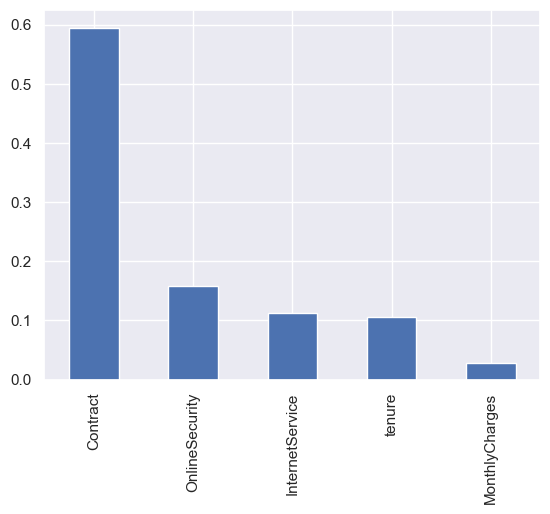

In [181]:
col_names = category_cols + numeric_cols
feature_importances = pd.Series(fi, index=col_names)
feature_importances.sort_values(ascending = False)[:5].plot(kind='bar')

[Text(0.6363636363636364, 0.9166666666666666, 'X[13] <= 0.5\ngini = 0.392\nsamples = 4930\nvalue = [3611, 1319]'),
 Text(0.45454545454545453, 0.75, 'X[7] <= 0.5\ngini = 0.491\nsamples = 2701\nvalue = [1535, 1166]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[16] <= 7.5\ngini = 0.499\nsamples = 1860\nvalue = [900, 960]'),
 Text(0.18181818181818182, 0.4166666666666667, 'X[6] <= 0.5\ngini = 0.454\nsamples = 751\nvalue = [262, 489]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.5\nsamples = 316\nvalue = [157, 159]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.366\nsamples = 435\nvalue = [105, 330]'),
 Text(0.5454545454545454, 0.4166666666666667, 'X[6] <= 0.5\ngini = 0.489\nsamples = 1109\nvalue = [638, 471]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.332\nsamples = 295\nvalue = [233, 62]'),
 Text(0.6363636363636364, 0.25, 'X[16] <= 16.5\ngini = 0.5\nsamples = 814\nvalue = [405, 409]'),
 Text(0.5454545454545454, 0.08333333333333333, 'gini = 0.467\nsamples = 245\nvalue = [91, 154]'),


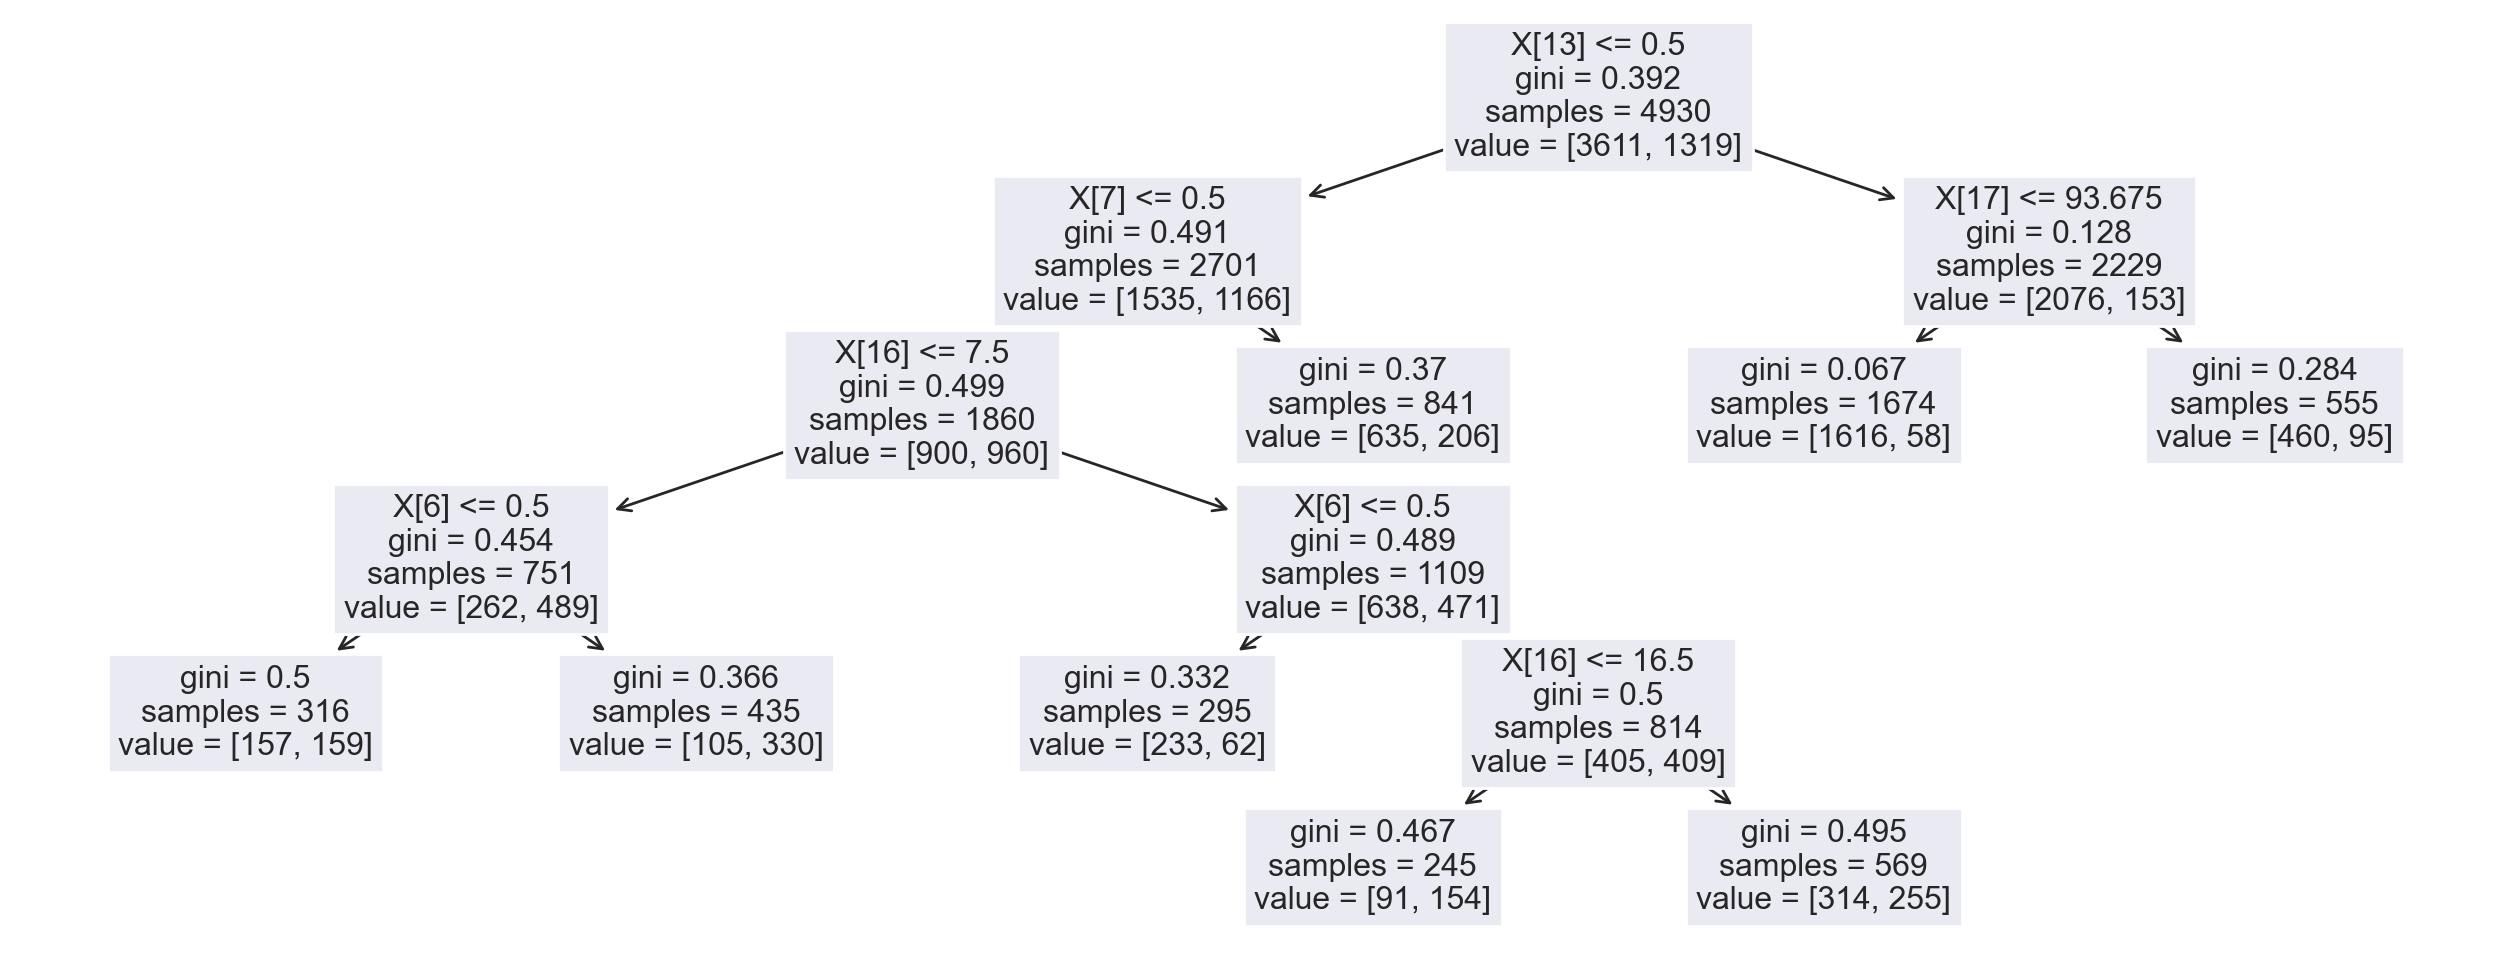

In [184]:
plt.figure(figsize=(16, 6), dpi=200)
tree.plot_tree(tree_search.best_estimator_.named_steps['decisiontreeclassifier'])

In [186]:
cat_rules = tree_search.best_estimator_.named_steps['columntransformer'].named_transformers_['cat'].categories_
cat_rules

[array(['Female', 'Male'], dtype=object),
 array([0, 1]),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [187]:
col_names[13], cat_rules[13]

('Contract', array(['Month-to-month', 'One year', 'Two year'], dtype=object))

In [188]:
col_names[17]

'MonthlyCharges'

In [189]:
(col_names[7], col_names[16], col_names[6])

('OnlineSecurity', 'tenure', 'InternetService')

Most users who are not on a month-to-month payment plan and have a monthly charge less than $92.5 tend to have a higher retention rate. Additionally, among month-to-month payment users who have not purchased OnlineSecurity (X[7] <= 0.5), have been with the company for less than 8 months (X[16] <= 7.5), and have purchased InternetService, the number of churned users is three times greater than the number of retained users.